In [20]:
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt
import os
from bispectral_networks.analysis.plotting import image_grid
import torch
%matplotlib inline

In [12]:
def load_images(path="../datasets/van-hateren/", 
                normalize=True, 
                img_shape=(1024, 1536), 
                select_img_path="./select_imgs.txt"):
    
    if select_img_path is not None:
        with open(os.path.join(path, 'select_imgs.txt'), "r") as f:
            img_paths = f.read().splitlines()
    else:
        img_paths = os.listdir(os.path.join(path, "images/"))

    all_imgs = []
    
    for i, img_path in enumerate(img_paths):
        try:
            with open(os.path.join(path, "images", img_path), 'rb') as handle:
                s = handle.read()
        except:
            print("Can't load image at path {}".format(path+img_path))
            continue
        img = np.fromstring(s, dtype='uint16').byteswap()
        if normalize:
            # Sets image values to lie between 0 and 1
            img = img.astype(float)
            img -= img.min()
            img /= img.max()
        img = img.reshape(img_shape)
        all_imgs.append(img)
            
    all_imgs = np.array(all_imgs)
    return all_imgs

# Visualizing the Training Data

This notebook provides a means for visualizing the dataset that the models are trained on. To run this notebook, the dataset must first be downloaded using the instructions from the README file in the top node folder of this repo. The dataset is a curated subset of the Van Hateren natural images database, curated by Bruno Olshausen and hosted online [here](http://rctn.org/bruno/data/myvanhateren/). The original citation for the dataset is below:

Van Hateren, J. H., & van der Schaaf, A. (1998). Independent component filters of natural images compared with simple cells in primary visual cortex. Proceedings of the Royal Society of London. Series B: Biological Sciences, 265(1394), 359-366.

We modify the dataset by pulling out image patches of size 16 x 16, normalizing each patch to center mean and unit standard deviation, and applying the group actions of translation or rotation to generate the orbit of each image patch. We first visualize the full images, and then show examples of the modified image patch dataset that the models are trained on.

In [17]:
imgs = load_images()

/tmp/ipykernel_14269/3900761713.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  img = np.fromstring(s, dtype='uint16').byteswap()


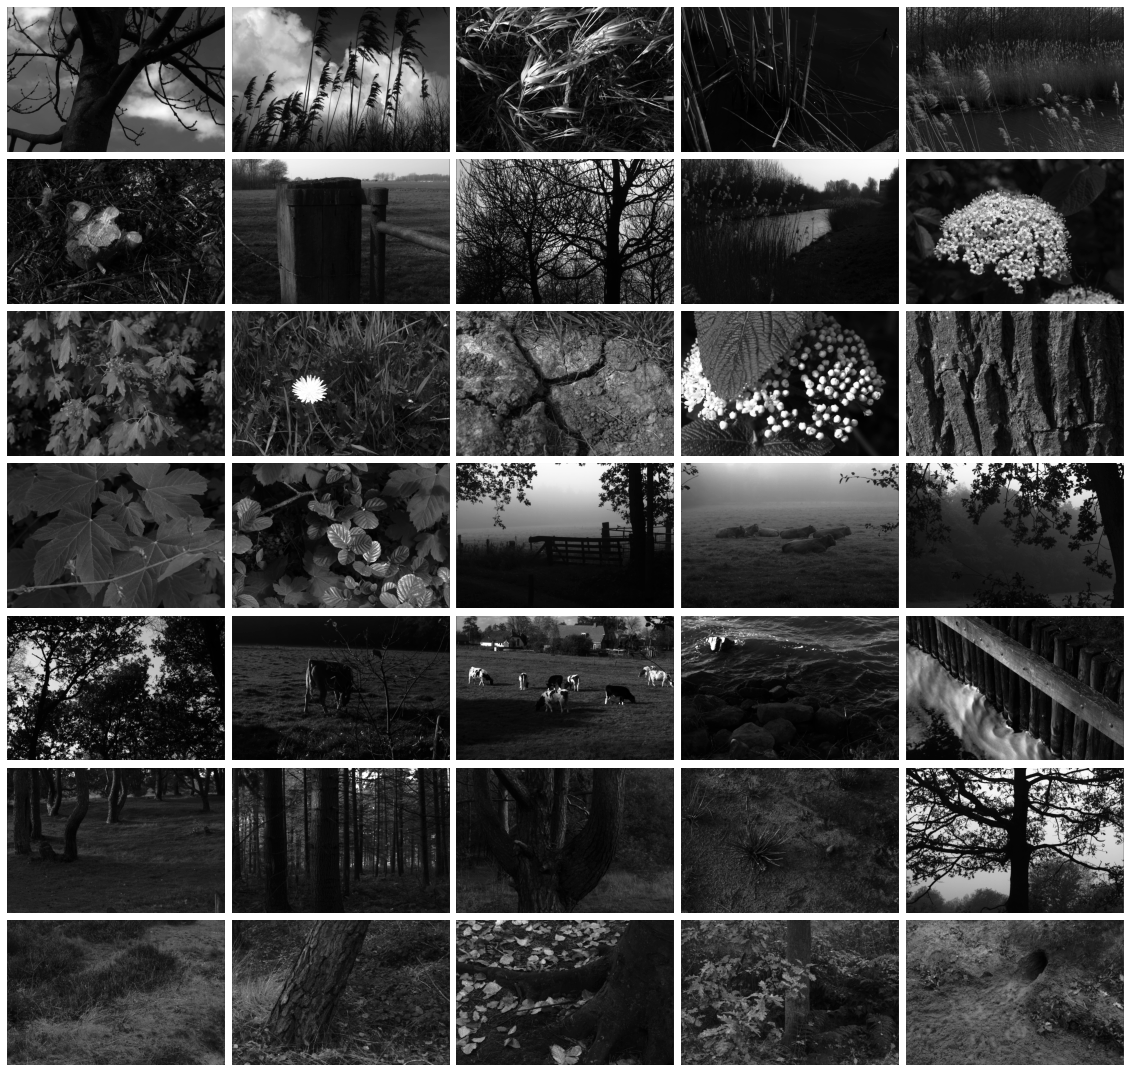

In [16]:
image_grid(imgs, shape=(7, 5), figsize=(20, 20), cmap="Greys_r")

## Translated Dataset

**Simple Demo**

We first show an example of the translated dataset, using a different random seed, number of transforms, and transform sample method than in the paper, for illustrative purposes.

In [18]:
from bispectral_networks.data.datasets import VanHateren, TransformDataset
from bispectral_networks.data.transforms import CyclicTranslation2D, CenterMean, UnitStd, Ravel

In [29]:
torch.random.seed()

# Pull patches from the dataset
pattern = VanHateren(path="../datasets/van-hateren/", min_contrast=0.1, patches_per_image=3, patch_size=16)

# Apply transformations
transform1 = CyclicTranslation2D(fraction_transforms=0.1, sample_method="linspace")
transform2 = CenterMean()
transform3 = UnitStd()
translation_dataset = TransformDataset(pattern, [transform1, transform2, transform3])
print(translation_dataset.data.shape)

torch.Size([2625, 16, 16])


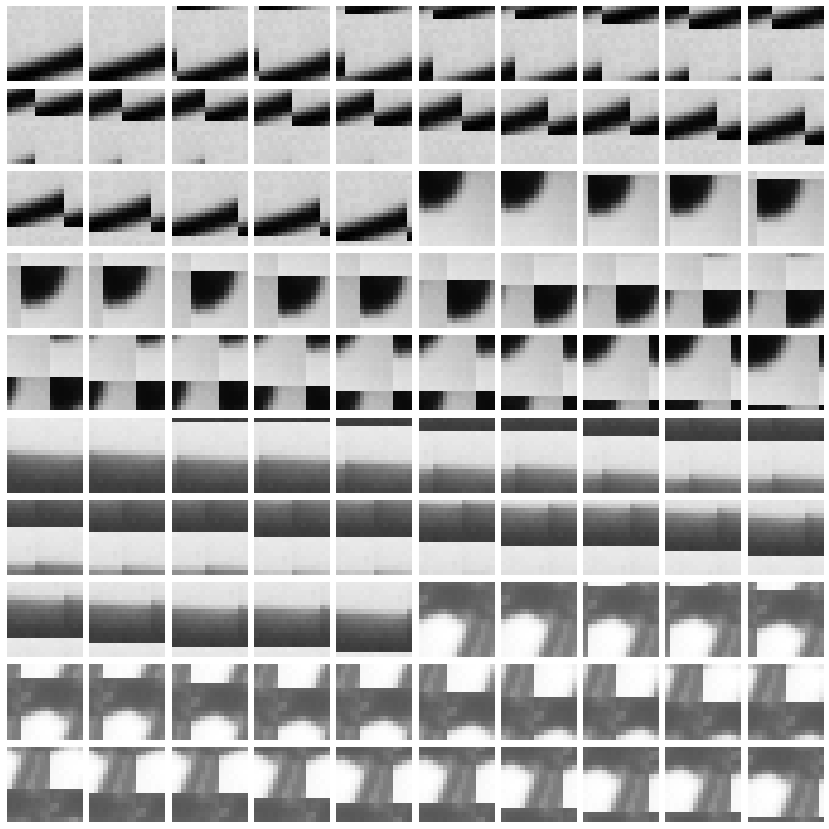

In [30]:
image_grid(translation_dataset.data[:100], shape=(10, 10), figsize=(15, 15))

**Training Data**

Below, we generate the exact dataset the model is trained on. The visualization below shows only a subset of the data.

In [46]:
torch.manual_seed(5)

# Pull patches from the dataset
pattern = VanHateren(path="../datasets/van-hateren/", min_contrast=0.1, patches_per_image=3, patch_size=16)

# Apply transformations
transform1 = CyclicTranslation2D(fraction_transforms=1.0, sample_method="random")
transform2 = CenterMean()
transform3 = UnitStd()
translation_dataset_train = TransformDataset(pattern, [transform1, transform2, transform3])
print(translation_dataset_train.data.shape)

torch.Size([26880, 16, 16])


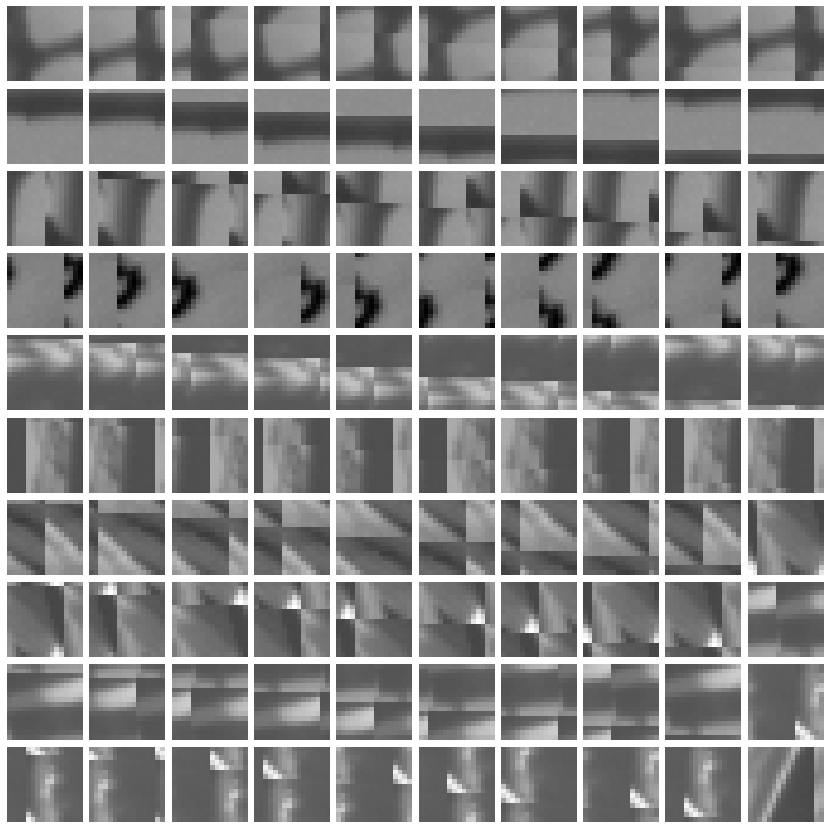

In [55]:
image_grid(translation_dataset_train.data[::26][:100], shape=(10, 10), figsize=(15, 15))

## Rotated Dataset

Here, we show an example of the rotated dataset, using a different random seed, number of transforms, and transform sample method than in the paper, for illustrative purposes.

In [37]:
from bispectral_networks.data.datasets import VanHateren, TransformDataset
from bispectral_networks.data.transforms import SO2, CircleCrop, CenterMean, UnitStd, Ravel

In [40]:
torch.random.seed()

# Pull patches from the dataset
pattern = VanHateren(path="../datasets/van-hateren/", min_contrast=0.1, patches_per_image=3, patch_size=16)

# Apply transformations
transform1 = CenterMean()
transform2 = UnitStd()
transform3 = SO2(fraction_transforms=0.1, sample_method="linspace")
transform4 = CircleCrop()
rotation_dataset = TransformDataset(pattern, [transform1, transform2, transform3, transform4])
print(rotation_dataset.data.shape)

torch.Size([3780, 16, 16])


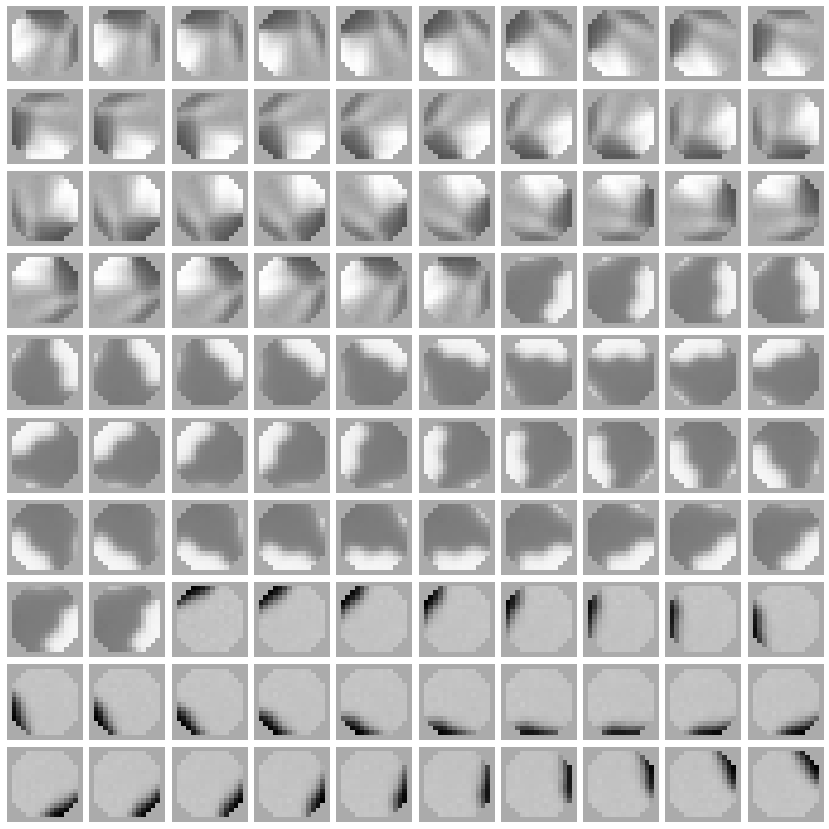

In [41]:
image_grid(rotation_dataset.data[:100], shape=(10, 10), figsize=(15, 15))

**Training Data**

Below, we generate the exact dataset the model is trained on. The visualization below shows only a subset of the data.

In [49]:
torch.manual_seed(5)

# Pull patches from the dataset
pattern = VanHateren(path="../datasets/van-hateren/", min_contrast=0.1, patches_per_image=3, patch_size=16)

# Apply transformations
transform1 = CenterMean()
transform2 = UnitStd()
transform3 = SO2(fraction_transforms=0.3, sample_method="random")
transform4 = CircleCrop()
rotation_dataset_train = TransformDataset(pattern, [transform1, transform2, transform3, transform4])
print(rotation_dataset_train.data.shape)

torch.Size([11340, 16, 16])


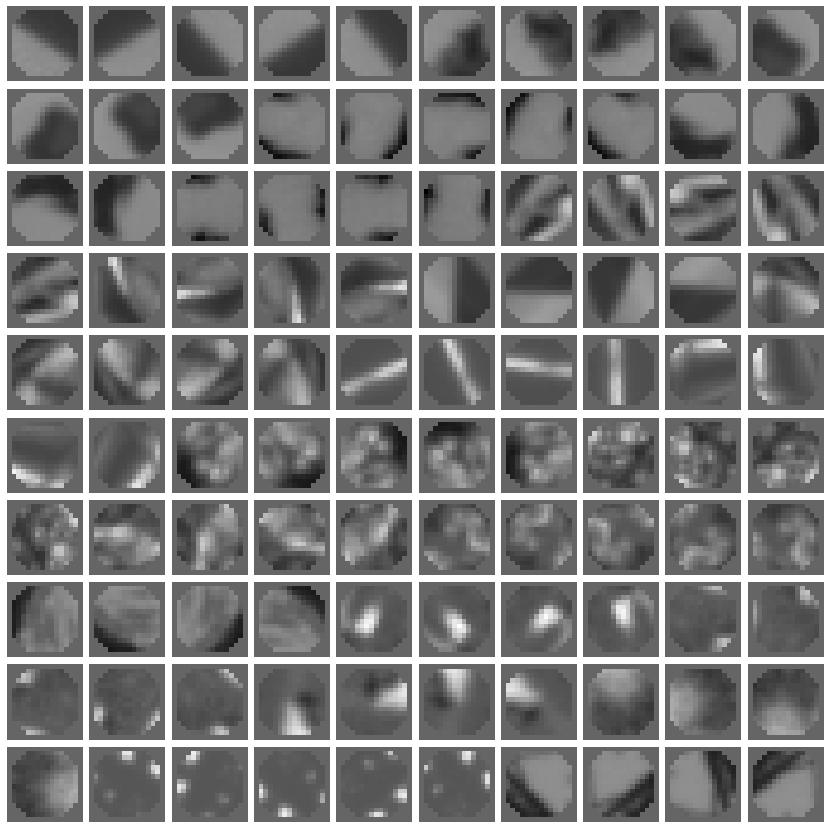

In [52]:
image_grid(rotation_dataset_train.data[::25][:100], shape=(10, 10), figsize=(15, 15))